In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorboard as tb

In [3]:
experiment_id = "eak025x0Rqu68rGxK1C3iw"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,summary,loss/Wall_clock_time,0,9.426731
1,summary,loss/Wall_clock_time,1,15.602955
2,summary,loss/Wall_clock_time,2,21.873987
3,summary,loss/Wall_clock_time,3,28.145401
4,summary,loss/Wall_clock_time,4,34.325703
...,...,...,...,...
18325,summary,sparsemax/support_mean,2995,20.625000
18326,summary,sparsemax/support_mean,2996,20.859375
18327,summary,sparsemax/support_mean,2997,21.812500
18328,summary,sparsemax/support_mean,2998,21.484375


In [7]:
print(df["run"].unique())
print(df["tag"].unique())

dfw = experiment.get_scalars(pivot=False) 
dfw

['summary']
['loss/Wall_clock_time' 'loss/discriminator' 'loss/g_loss' 'loss/log_pg'
 'loss/temperature' 'metrics/nll_gen' 'metrics/nll_oracle'
 'sparsemax/support_mean']


,run,tag,step,value
0,summary,loss/Wall_clock_time,0,9.426731
1,summary,loss/Wall_clock_time,1,15.602955
2,summary,loss/Wall_clock_time,2,21.873987
3,summary,loss/Wall_clock_time,3,28.145401
4,summary,loss/Wall_clock_time,4,34.325703
...,...,...,...,...
18325,summary,sparsemax/support_mean,2995,20.625000
18326,summary,sparsemax/support_mean,2996,20.859375
18327,summary,sparsemax/support_mean,2997,21.812500
18328,summary,sparsemax/support_mean,2998,21.484375


In [8]:
csv_path = '../oracle/experiments/cc_out/20221208/oracle/oracle_rmc_vanilla_RSGAN_adam_bs64_sl20_sn0_dec0_ad-no_npre150_nadv3000_ms1_hs256_nh2_ds5_dlr1e-4_glr1e-4_tem1_demb64_nrep64_hdim32_sd99_sparseTrue_alpha1.2/tb_logs.csv'
dfw.to_csv(csv_path, index=False)

Text(0, 0.5, 'NLL')

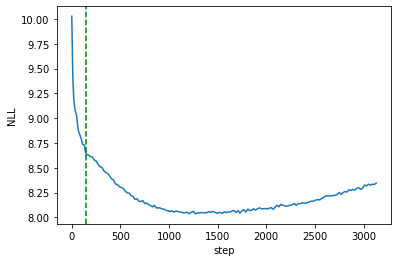

In [41]:
PRETRAIN_END = 150

nll_oracle = dfw[dfw['tag'] == "metrics/nll_oracle"]
nll_oracle = nll_oracle.set_index('step')
# print(nll_oracle['value'])
# print(nll_oracle['step'])
plt.plot(nll_oracle['value'])
plt.axvline(x=PRETRAIN_END, linestyle='--', color='g')
plt.xlabel('step')
plt.ylabel('NLL')